# Création données géographiques

## csv vers graphe

On va charger le fichier des villes française puis créer un point avec les coordonnées. On va procéder comme dans le [tutoriel](https://geopandas.org/gallery/create_geopandas_from_pandas.html).

On utilise [geopandas.read_file](https://geopandas.org/docs/reference/api/geopandas.read_file.html#geopandas-read-file)

In [3]:
import geopandas as gpd
import pandas as pd

In [19]:
v1 = pd.read_csv("./villes_france_30000.csv")

In [20]:
v1

,idx,INSEE,nom,latitude,longitude,population
0,1,75100,Paris,48.867,2.333,2152423
1,2,13200,Marseille,43.300,5.400,800550
2,3,69380,Lyon,45.750,4.850,415487
3,4,31555,Toulouse,43.600,1.433,358688
4,5,6088,Nice,43.700,7.250,342439
...,...,...,...,...,...,...
29995,29996,52195,Farincourt,47.700,5.683,68
29996,29997,70090,Boursieres,47.617,6.050,68
29997,29998,54224,Germonville,48.400,6.217,68
29998,29999,73049,Bonvillaret,45.567,6.300,68


In [21]:
v1.dtypes

idx             int64
INSEE           int64
nom            object
latitude      float64
longitude     float64
population      int64
dtype: object

In [22]:
v1.columns

Index(['idx', 'INSEE', 'nom', 'latitude', 'longitude', 'population'], dtype='object')

Attention, le [code insee](https://fr.wikipedia.org/wiki/Code_officiel_g%C3%A9ographique) n'est pas le code postal.

In [23]:
v1[lambda df: df["nom"] == "Marseille"]

,idx,INSEE,nom,latitude,longitude,population
1,2,13200,Marseille,43.3,5.4,800550


In [24]:
v1[lambda df: df.population >= 250000]

,idx,INSEE,nom,latitude,longitude,population
0,1,75100,Paris,48.867,2.333,2152423
1,2,13200,Marseille,43.300,5.400,800550
2,3,69380,Lyon,45.750,4.850,415487
3,4,31555,Toulouse,43.600,1.433,358688
4,5,6088,Nice,43.700,7.250,342439
5,6,67482,Strasbourg,48.583,7.750,252338


In [25]:
len(v1[lambda df: df.population >= 100000])

35

In [46]:
len(v1[lambda df: df.population >= 50000])

94

On crée la geometry en disant que c'est un point, et on place le crs à ce qu'il faut.

In [ ]:
villes = gpd.GeoDataFrame(v1, 
                          geometry=gpd.points_from_xy(v1.longitude, v1.latitude), 
                          crs="EPSG:4326")

<Axes: >

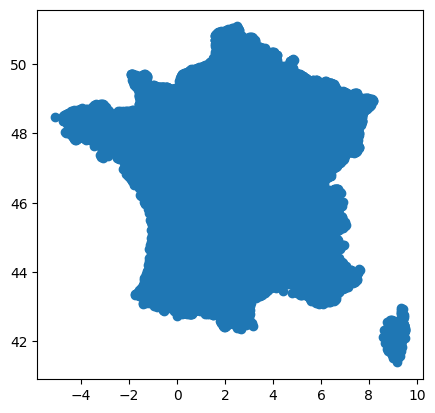

In [11]:
villes.plot()

garder les grandes villes :

<Axes: >

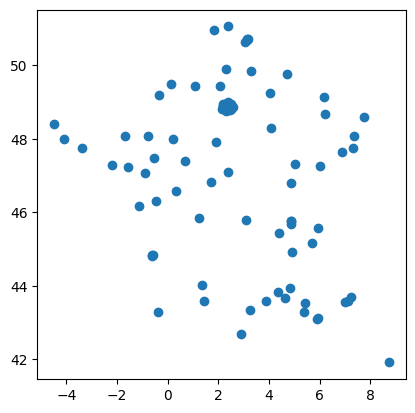

In [48]:
villes[lambda df: df.population >= 50000].plot()

Beaucoup de villes entre 50000 et 100000 habitants en ile de France.

In [27]:
regions = gpd.read_file("https://raw.githubusercontent.com/gregoiredavid/france-geojson/master/regions.geojson")

In [28]:
regions

,code,nom,geometry
0,11,Île-de-France,"POLYGON ((2.59052 49.07965, 2.59602 49.08171, ..."
1,24,Centre-Val de Loire,"POLYGON ((2.87463 47.52042, 2.87984 47.51671, ..."
2,27,Bourgogne-Franche-Comté,"POLYGON ((3.62942 46.74946, 3.62655 46.75228, ..."
3,28,Normandie,"MULTIPOLYGON (((-1.11962 49.35557, -1.11554 49..."
4,32,Hauts-de-France,"POLYGON ((4.1409 49.97876, 4.14407 49.97625, 4..."
5,44,Grand Est,"POLYGON ((4.23316 49.95775, 4.2369 49.95858, 4..."
6,52,Pays de la Loire,"MULTIPOLYGON (((-2.62284 47.40975, -2.62341 47..."
7,53,Bretagne,"MULTIPOLYGON (((-3.47716 48.88127, -3.47863 48..."
8,75,Nouvelle-Aquitaine,"MULTIPOLYGON (((1.41519 46.34722, 1.41675 46.3..."
9,76,Occitanie,"MULTIPOLYGON (((1.78613 42.57362, 1.78661 42.5..."


In [30]:
regions.loc[0]

code                                                       11
nom                                             Île-de-France
geometry    POLYGON ((2.59052 49.07965, 2.59602 49.08171, ...
Name: 0, dtype: object

In [38]:
len(villes[lambda df: df.geometry.within(regions.loc[0].geometry)])

1150

In [47]:
villes[lambda df: df.population >= 50000]

,idx,INSEE,nom,latitude,longitude,population,geometry
0,1,75100,Paris,48.867,2.333,2152423,POINT (2.333 48.867)
1,2,13200,Marseille,43.300,5.400,800550,POINT (5.4 43.3)
2,3,69380,Lyon,45.750,4.850,415487,POINT (4.85 45.75)
3,4,31555,Toulouse,43.600,1.433,358688,POINT (1.433 43.6)
4,5,6088,Nice,43.700,7.250,342439,POINT (7.25 43.7)
...,...,...,...,...,...,...,...
89,90,33318,Pessac,44.800,-0.617,51055,POINT (-0.617 44.8)
90,91,36044,Chateauroux,46.817,1.700,50969,POINT (1.7 46.817)
91,92,53130,Laval,48.067,-0.767,50473,POINT (-0.767 48.067)
92,93,78586,Sartrouville,48.950,2.183,50329,POINT (2.183 48.95)


In [45]:
villes[lambda df: (df.population >= 50000) & (df.geometry.within(regions.loc[0].geometry))]

,idx,INSEE,nom,latitude,longitude,population,geometry
0,1,75100,Paris,48.867,2.333,2152423,POINT (2.333 48.867)
34,35,92012,Boulogne-Billancourt,48.833,2.250,101743,POINT (2.25 48.833)
37,38,93048,Montreuil,48.867,2.433,94754,POINT (2.433 48.867)
39,40,95018,Argenteuil,48.950,2.250,93096,POINT (2.25 48.95)
40,41,93066,Saint-Denis,48.933,2.358,89988,POINT (2.358 48.933)
41,42,78646,Versailles,48.800,2.133,87789,POINT (2.133 48.8)
43,44,92050,Nanterre,48.900,2.200,84565,POINT (2.2 48.9)
44,45,94081,Vitry-sur-Seine,48.783,2.400,82400,POINT (2.4 48.783)
45,46,93005,Aulnay-sous-Bois,48.950,2.517,82314,POINT (2.517 48.95)
47,48,94028,Creteil,48.783,2.467,82088,POINT (2.467 48.783)


In [49]:
len(villes[lambda df: (df.population >= 50000) & (df.geometry.within(regions.loc[0].geometry))])

24

## Carte interactive

In [50]:
import folium

In [53]:
from geopy import Nominatim # geodécodeur d'openstretmap

locator = Nominatim(user_agent="jupiter cours")
centre_Fr = locator.geocode("Bruère-Allichamps, France")

In [71]:
m = folium.Map(location=centre_Fr.point[:2],
               #tiles='Stamen Terrain',
               zoom_start=5
              )

In [57]:
m

In [62]:
villes[lambda df: (df.population >= 200000)]

,idx,INSEE,nom,latitude,longitude,population,geometry
0,1,75100,Paris,48.867,2.333,2152423,POINT (2.333 48.867)
1,2,13200,Marseille,43.300,5.400,800550,POINT (5.4 43.3)
2,3,69380,Lyon,45.750,4.850,415487,POINT (4.85 45.75)
3,4,31555,Toulouse,43.600,1.433,358688,POINT (1.433 43.6)
4,5,6088,Nice,43.700,7.250,342439,POINT (7.25 43.7)
5,6,67482,Strasbourg,48.583,7.750,252338,POINT (7.75 48.583)
6,7,44109,Nantes,47.217,-1.550,244995,POINT (-1.55 47.217)
7,8,33063,Bordeaux,44.833,-0.567,210336,POINT (-0.567 44.833)
8,9,34172,Montpellier,43.600,3.883,207996,POINT (3.883 43.6)


J'utilise le tuto de <https://geopandas.org/en/stable/gallery/plotting_with_folium.html#Add-markers> :

In [72]:
for i, ville in villes[lambda df: (df.population >= 200000)].iterrows():
    folium.Marker(
        [ville.latitude, ville.longitude],
        icon=folium.Icon(color='green'),
        popup=ville.nom
    ).add_to(m)


In [73]:


m